<h2><center>HEPATITIS EXPLORATORY DATA ANALYSIS <br> <center></h2>


### IMPORTING LIBRARIES 

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp


### Reading Data

In [2]:
dataset = pd.read_csv("hepatitis_csv.csv")

<p> Using the Pandas command <b>read_csv</b> to automatically read the file into a DataFrame. </p>

In [3]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
dataset.shape

(155, 20)

<p> The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data.<br>
The dataset consists of <b>155 rows observations and 20 variables</p> 

### EXPLORATORY DATA ANALYSIS (EDA)

<p>Exploratory data analysis is a complement to inferential statistics, which tends to be fairly rigid with rules and formulas.<br> 
At an advanced level, EDA involves looking at and describing the data set from different angles and then summarizing it.</p>

<p> In exploratory data analysis, we cover the following major topics <br> 

– Handle Missing value<br>
– Removing duplicates<br>
– Outlier Treatment<br>
– Normalizing and Scaling( Numerical Variables) <br>
– Encoding Categorical variables( Dummy Variables)<br>
– Bivariate Analysis

</p>


In [5]:
dataset.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


<p>The head function will tell the top records in the data set. By default, python shows you only the top 5 records since we have given "head(10)" it shows top 10 records of data.</p>

<p>
As we can see above, there are missing values identified with 'NaN'.</p>

In [6]:
dataset.isnull().sum() ## checks for missing or null values in each column

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

<p>info() is used to check the Information about the data and the datatypes of each respective attribute.</p>

In [8]:
dataset.dtypes ## knowing the data types of each variables


age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

<p>As we can see above, 12 out of 20 variable appear to be object data type, 2 boolean, 5 float and 1 integer data type.
Some of these variable are categoricals and some of them are numericals.
It is requiered to have numerical data, we will convert categorical data that has values 'TRUE', 'FALSE' to 1 and 0 respectively. It is required to change all data types into float for analysis.</p>

### Encoding

In [9]:
labels_to_numbers = {'False': 0,
               'True': 1,
               'die': 0,
               'live': 1,
               'NaN': np.nan,
               'female': 0,
               'male': 1}

dataset.replace(labels_to_numbers, inplace = True)

In [10]:
dataset = dataset.astype(float)

In [11]:
dataset.columns ## knowing column names

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [12]:
## Numerical and categorical values
numerical_var = ['age','bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
categorical_var = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices','histology','class']

In [13]:
## For numerical data
dataset[numerical_var].describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


<p>The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

<p> --We can observed in the table that the patients belong to an age bracket of 7-78 years, with a mean of 41.2 and a median of 39.
<br> --There are missing values in most of the variables but in particular in protime where we only have 88 observations.
<br> --If we pay attention to the means of the different variables, it is interesting to note that they display a moderate variance; the range goes from 1.42 (bilirubin) to 105.35 (alk_phosphate).
<br> --Also, the variables sgot and alk_phosphate show a high standard deviation and their distribution could be right skewed due to the fact that the mean is higher than the median. 
<br> --The rest of the variables appear to be normally distributed (mean ~ median). The distribution of our variables is important to considered because they could affect lately our machine learning algorithm. So we could evaluate to perform a transformation to fix the skewness observed.



In [14]:
## For categorical data 
dataset[categorical_var].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85,32
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70,123


<p>In this case, there is a marked predominance of observations belonging to level 0 in the variable <b>SEX which means that the dataset include more female than male patients. </b>Likewise, the variables ANTIVIRALS, ANOREXIA, ASCITES and VARICES include much more observations in the <b>class 0 than in the class 1. </b>
This could point out that these features are differentially present in the patients and could be interesting variables influencing their survival.

In [15]:
### Discretization of age  column

dataset["age"]=np.where((dataset["age"]>10) & (dataset["age"]<20),"Teenagers",
                   np.where((dataset["age"]>=20) & (dataset["age"]<=30),"Adults",
                   np.where((dataset["age"]>30) & (dataset["age"]<=40),"Middle Aged",np.where((dataset["age"]<=10),"Children",
                            "Old"))))

In [16]:
dataset["age"]=pd.Categorical(dataset.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [17]:
dataset['age'].value_counts()

Old            72
Middle Aged    50
Adults         32
Children        1
Teenagers       0
Name: age, dtype: int64

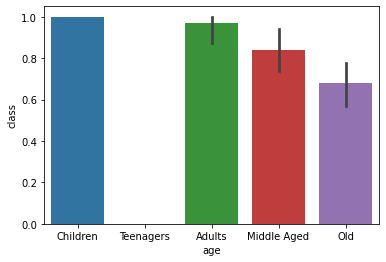

In [18]:
#a bar plot of Age vs. survival
sns.barplot(x="age", y="class", data=dataset)
plt.show()

### Cleaning the data - Handling missing values 

<h4>It is known that there are various missing values in the respective columns which requires different techniques. Type of technique is actually dependent on the type of data we are dealing with.</h3>

<p>In our case, we are going to drop them but using the Pandas function <b>dropna()</b>. We will create a new data frame by selecting only the interesting value for analysis.

In [19]:
hepatitis_analysis = dataset.dropna()
interesting_values= ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
hepatitis_analysis = hepatitis_analysis[interesting_values]
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


### Handling duplicate values

In [20]:
dups = dataset.duplicated()
print(dups.sum())
dataset[dups]

0


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class


#### No duplicate values found in the dataset

### Outlier Treatment

<function matplotlib.pyplot.show(*args, **kw)>

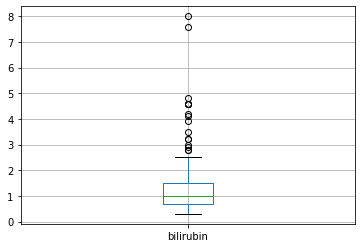

In [21]:
dataset.boxplot(column=['bilirubin'])
plt.show

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 + IQR)
    upper_range = Q3+(1.5 + IQR)
    return lower_range, upper_range

In [23]:
low_bilirubin,high_bilirubin = remove_outlier(dataset['bilirubin'])
dataset['bilirubin']=np.where(dataset['bilirubin']>high_bilirubin,high_bilirubin,dataset['bilirubin'])
dataset['bilirubin']=np.where(dataset['bilirubin']<low_bilirubin,low_bilirubin,dataset['bilirubin'])

<function matplotlib.pyplot.show(*args, **kw)>

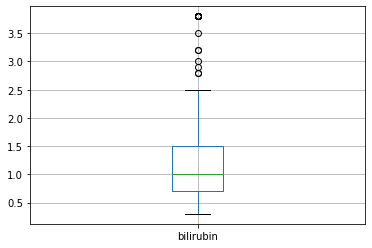

In [24]:
dataset.boxplot(column=['bilirubin'])
plt.show

### Bivariate Analysis

#### In order to perform the correlation analysis with all our variables, we first need to apply the function factorize to the columns containing non continuos variables in order to obtain a numeric representation of the categorical values contained in the dataset.

In [32]:
dataset[categorical_var] = dataset[categorical_var].apply(lambda x : pd.factorize(x)[0])

In [33]:
corr = dataset.dropna().corr(method = 'pearson')


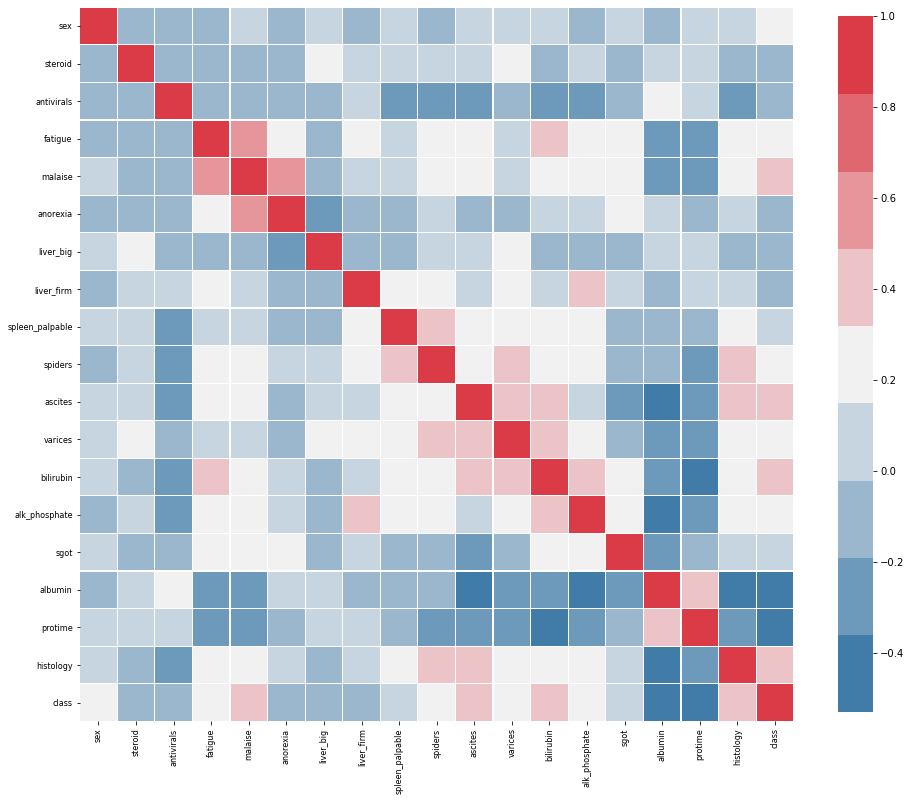

In [34]:
plt.figure(figsize=(16, 16))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);


#### Normal Correlation Matrix

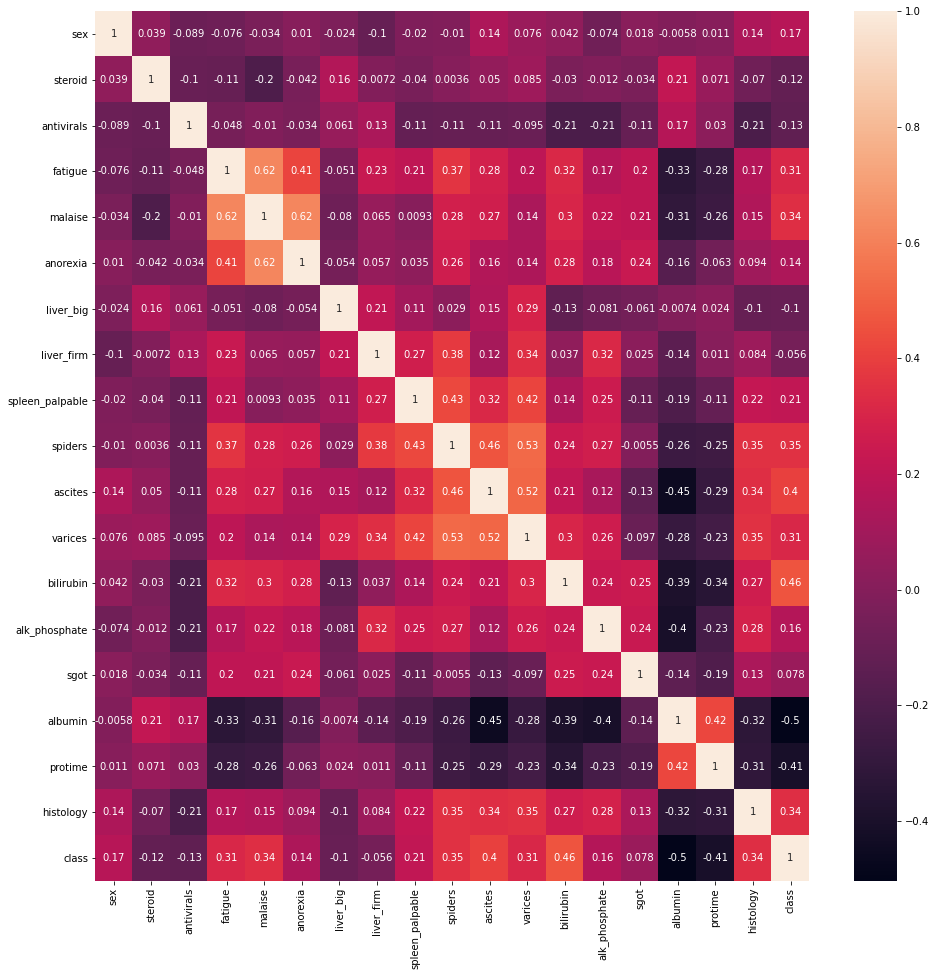

In [35]:
corr_matrix = dataset.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Thus, it is visible from the heatmap that some of the variables show a coefficient of ~0.6 or -0.4, but most of them display a very low correlation coefficient. So we can conclude that there is no strong linear correlation between our variables.